# Data Cleaning Pipeline

Simplified steps for common data cleaning tasks.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Load Data

```python
df = pd.read_csv('your_data.csv')
df.head()
```

## 2. Missing Data
Data cleaning ensures high-quality, accurate, and usable data for machine learning models. Here’s a structured approach to identifying and fixing data issues.
- Approach: Identify columns/rows with missing values using


In [12]:
df.isnull().sum()

Survived    0
Age         0
Embarked    2
dtype: int64

## Comprehensive Guide to Handling Missing Data

Missing data is a common challenge in data preprocessing and analysis. Choosing the right approach depends on the nature of the missing values, their distribution, and the impact on the model or analysis. Below are the possible techniques and their implementations.

🔸 *Deletion Methods*
This approach is used when missing values are randomly distributed and have a low percentage in the dataset.

1.1 Listwise (Row) Deletion: Removes rows where any column has missing values.
When to use:

▫️ Your dataset is large and losing a few rows won’t hurt and also best for small datasets where missing data is minimal.


In [13]:
df.dropna(inplace=True)  # Removes rows with missing values

1.2 Pairwise (Row) Deletion: This is for when you have a dataset with some missing values. Instead of removing entire rows (listwise deletion), pairwise deletion lets you keep as much data as possible for each analysis.

When to use:

▫️Useful for correlation and covariance calculations.

Sample Dataset with Missing Values 👇

In [14]:
# Sample data with missing values
data = {
    "A": [10, 20, np.nan, 40, 50],
    "B": [5, np.nan, 15, 20, 25],
    "C": [np.nan, 1, 2, 3, 4]
}

df = pd.DataFrame(data)
print("\nDataFrame after dropping rows with missing values:\n", df)


DataFrame after dropping rows with missing values:
       A     B    C
0  10.0   5.0  NaN
1  20.0   NaN  1.0
2   NaN  15.0  2.0
3  40.0  20.0  3.0
4  50.0  25.0  4.0


🔹 Listwise Deletion (Removes Entire Rows)

🚫 Problem: Removes too much data!

In [15]:
df_listwise = df.dropna()
print("\nListwise Deletion:\n", df_listwise)


Listwise Deletion:
       A     B    C
3  40.0  20.0  3.0
4  50.0  25.0  4.0


🔹 Pairwise Deletion (Keeps Data for Each Pair Separately)

In [16]:
# Pairwise correlation (drops missing values per pair)
corr_matrix = df.corr(method='pearson')
print("\nPairwise Deletion - Correlation Matrix:\n", corr_matrix)


Pairwise Deletion - Correlation Matrix:
      A    B    C
A  1.0  1.0  1.0
B  1.0  1.0  1.0
C  1.0  1.0  1.0


I don't think I want to ever use this pair wise approach☝️😅

1.3 Column-wise Deletion (Remove Columns): This is useful to drop columns where most values are missing and also best for Variables with >90% missing values.

In [ ]:
df.drop(columns=['column_name'], inplace=True)  # Removes specific columns

🔸*Imputation Methods*

Imputation fills missing values with estimated values to preserve dataset integrity.

2.1 Mean/Median Imputation (Numerical)

### Choosing Between Mean, Median, and Mode Imputation

Introduction

Selecting the appropriate imputation methods (mean, median, or mode) for handling missing values in datasets to preserve the dataset integrity can seem tricky at times. But in this section We'll explore rules of thumb, demonstrate practical implementations using Python, and analyze the effects of each imputation method on data distribution. 

1. Identify Your Feature Type
Determining the type of data is an essential first step in the process.

Numeric (continuous or ordinal) → consider mean or median.

Categorical (nominal) → use mode.

2. Next to for the missing rate

### Missing rate

| **Low (< 10 %)** | **High (> 15 %)** |
|----------------------|---------------------|
| → continue with mean/median/mode | → consider advanced methods |

In [ ]:
missing_count = df.isnull().sum()
total_rows = len(df)

missing_rate = (missing_count / total_rows) * 100
print(f"\nMissing Rate:\n{missing_rate}")


Missing Rate:
Survived    0.000000
Age         0.000000
Embarked    0.225479
dtype: float64


Since Embarked has >15% missing values, I will consider using advanced imputation methods because simple single-value fills can heavily bias variance and correlations, such as:

→ KNN Imputation (fill missing values using similar rows)

→ Regression Imputation (predict missing values based on other features)

→ Multiple Imputation (MICE) (create multiple estimations and average them)

NB: WILL TACKLE AFTER THIS IMPUTAION METHOD (MEDIAN, MEAN AND MODE)

3. Check the Distribution (for Numeric Features) i.e Symmetric, roughly bell-shaped

| **Distribution Type** | **Imputation Method** | **Reasoning** |
|----------------------|---------------------|----------------|
| Normal Distribution (Skewness ≈ 0) | Mean Imputation (`fillna(mean)`) | Mean retains true data characteristics |
| Moderate Skew (Skewness ≈ 0.5 to 2) | Median Imputation (`fillna(median)`) | Median resists the influence of outliers |
| Highly Skewed (Skewness > 2) | Mode Imputation (`fillna(mode)`) | Mode best preserves categorical or extreme values |


4. Assess Outliers

→ If you spot extreme outliers in your Data, prefer the median so those points don’t distort your fill-ins.

→ If your data has no significant outliers, mean is fine.

### Here's a Step-by-Step Code Implementation of the (Mean, Median and Mode) Imputation Method 👇

In [3]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load and preview data
url = "C:/Users/hp/Downloads/titanic.csv"
df = pd.read_csv(url)
df = df[['Survived', 'Age', 'Embarked']]  # Focus on relevant columns

# 🔍 Step 1: Check for Missing Values
print("Missing Values Count:\n", df.isnull().sum())

print("\nData preview:")
df.head()

Missing Values Count:
 Survived    0
Age         0
Embarked    2
dtype: int64

Data preview:


,Survived,Age,Embarked
0,0,22.0,S
1,1,38.0,C
2,1,26.0,S
3,1,35.0,S
4,0,35.0,S


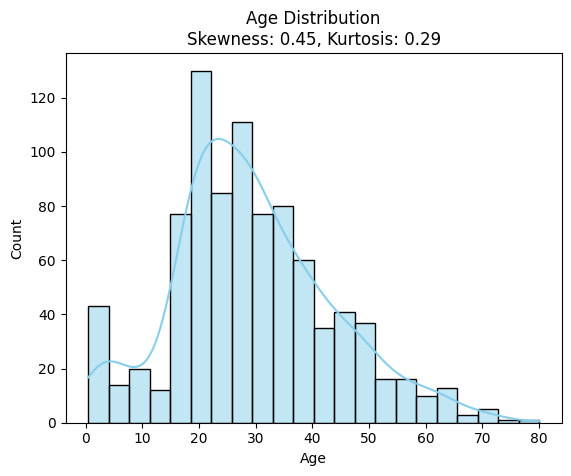

In [4]:
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Age Distribution\nSkewness: {:.2f}, Kurtosis: {:.2f}'.format(df['Age'].skew(), df['Age'].kurtosis()))
plt.show()

In [ ]:

skew_val = skew(df['Age'].dropna())
kurt_val = kurtosis(df['Age'].dropna())

print(f"Skewness: {skew_val:.3f}, Kurtosis: {kurt_val:.3f}")

if abs(skew_val) < 0.5 and abs(kurt_val - 3) < 0.5:
    print("✅ Data appears normally distributed")
else:
    print("⚠️ Data is likely non-normal")

Skewness: 0.446, Kurtosis: 0.284
⚠️ Data is likely non-normal


## Note: I used the technique above to check if the column Age was normally distribute using a histogram, Skewness & Kurtosis ☝️

In [21]:
# 🔍 Step 3: Compute Mean, Median, Mode
mean_val = df['Age'].mean()
median_val = df['Age'].median()
mode_val = df['Embarked'].mode()[0]  # Mode might return multiple values

print(f"Mean: {mean_val:.2f}, Median: {median_val:.2f}, Mode: {mode_val}")

Mean: 29.47, Median: 28.00, Mode: S


In [40]:
# 🔍 Step 4: Check Skewness
skewness = skew(df['Age'].dropna())
print(f"Skewness: {skewness:.2f}")

Skewness: 0.45


In [ ]:
#  Step 5: Decide Imputation Method
if abs(skewness) < 0.5:
    print("✅ Data is **normally distributed** → Use **Mean Imputation**")
elif 0.5 <= abs(skewness) < 2:
    print("✅ Data is **moderately skewed** → Use **Median Imputation**")
else:
    print("✅ Data is **highly skewed** → Use **Mode Imputation**")

✅ Data is **normally distributed** → Use **Mean Imputation**


## Decision Workflow

```mermaid
graph TD
  A[Identify Missing Data] --> B{Data Type?}

  B -->|Numerical| C[Check Skewness]
  B -->|Categorical| D[Use Mode Imputation]

  C -->|Skewness ≤ 0.5| E[Use Mean]
  C -->|Skewness > 0.5| F[Use Median]

  E --> G[Add Missing-Indicator Flag]
  F --> G
  D --> G

## 3. Outliers
Outliers are data points significantly different from other observations and can negatively impact model performance. The objective here is to be able to detect and manage outliers  without having to discard valuable information. 

### Identification Techniques
Before you ever consider removing or transforming outliers, you must first identify them using either statistical or visualization techniques such as:

#### Statistical Methods

    Z-score: For normally distributed data, values beyond a certain z-score (e.g., ±2 or ±3) can be considered outliers. But I prefer flagging values beyond ±3 standard deviation
    
### **Identifying Outliers Using Z-Score**
The **Z-score method** helps detect outliers by measuring how far each data point is from the **mean** in terms of standard deviations.

#### **🔹 Formula for Z-score**
$$
z = \frac{X - \mu}{\sigma}
$$

Where:

* $X$ = the data point
* $\mu$ = mean of the dataset
* $\sigma$ = standard deviation of the dataset

 **Common Outlier Thresholds:**  
- **|Z| > 3** → Extreme outlier (More than 3 standard deviations from the mean)  
- **|Z| > 2** → Moderate outlier  

---


| Aspect                | Details                                                              |
| --------------------- | -------------------------------------------------------------------- |
| **Purpose**           | Identify outliers in a dataset                                       |
| **Best For**          | Normally distributed, continuous numerical data                      |
| **Common Thresholds** | ±2.0 (moderate outliers), ±3.0 (extreme outliers)                    |
| **Limitations**       | Sensitive to non-normal distributions and existing outliers          |
| **Alternatives**      | Modified z-score, Interquartile Range (IQR), or other robust methods |
| **Dataset**           | Works well in large datasets |

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'value': [10, 20, 22, 25, 30, 100, 105, 200, 1000]})

In [81]:
### **🔹 Python Code to Identify Outliers Using Z-Score**

# Calculate mean and standard deviation
mean_val = df['value'].mean()
std_dev = df['value'].std()

# Compute Z-score
df['Z_score'] = (df['value'] - mean_val) / std_dev

# Identify outliers (Z-score greater than 3 or less than -3)
outliers = df[df['Z_score'].abs() > 2]

print("Outliers:\n", outliers)

Outliers:
    value   Z_score
8   1000  2.615502


    IQR (Interquartile Range): For skewed data, values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers.

In [56]:
# Set thresholds
lower = df['value'].quantile(0.05)
upper = df['value'].quantile(0.95)

#### Visual Methods: Box plots, scatter plots.

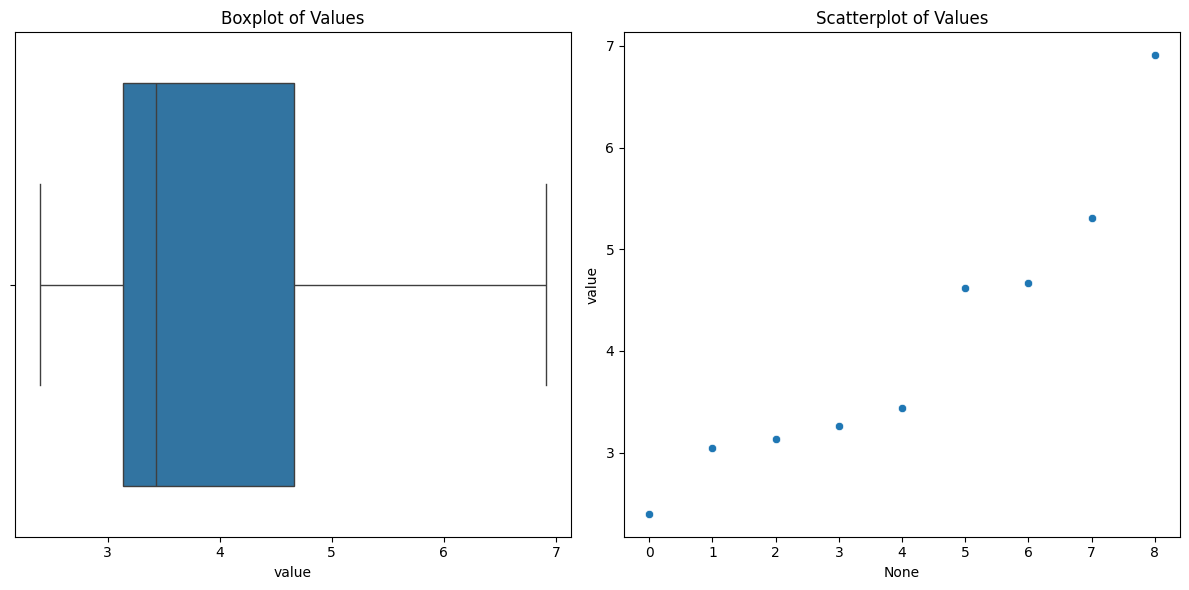

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(x=df['value'], ax=ax1)
ax1.set_title('Boxplot of Values')

sns.scatterplot(x=df.index, y=df['value'], ax=ax2)
ax2.set_title('Scatterplot of Values')

plt.tight_layout()
plt.show()

In [58]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

### Treatment Approach:
    Removal:This method is applied when the data points are so extreme they likely result from data‐entry mistakes (e.g. impossible ages like –5 or 999), You “clean” the dataset by dropping points that have no realistic value.

In [59]:

df_remove = df[(df['value'] >= Q1 - 1.5 * IQR) & (df['value'] <= Q3 + 1.5 * IQR)]

    Transforming Outliers: Here you apply mathematical transformations (e.g., logarithmic, square root) to reduce the impact of outliers and make the data more normally distributed.
You can use **transformation methods** to treat outliers when your dataset has **extreme values that are valid** but cause problems due to **skewness or scale**. Transformations are not meant to "remove" outliers, but to **reduce their influence** by compressing the range of the data.

Here’s when it makes the most sense to use transformations:

---

##  Use Transformations When:

### 1. **The data is heavily skewed**

* Example: income, sales volume, house prices, or anything with a long tail.
* If you plot a histogram and see values clustered at one end with a long stretch of large values → transformation can help.
* **Goal:** Make the distribution more symmetric for algorithms that prefer normally distributed input (e.g., linear regression, logistic regression).

### 2. **Outliers are real and meaningful**

* You **don’t want to remove** or cap them because they contain valuable information (e.g., unusually high sales or usage).
* Transforming lets you **keep all records** while reducing the outliers’ impact.

### 3. **You’re using models sensitive to outliers**

* Algorithms like:

  * Linear regression
  * Logistic regression
  * K-means clustering
  * PCA
* These assume normality or are affected by large distances.
* Transforming makes these models more robust and stable.

---

## ⚠️ When to Avoid Transforming:

* If you're using **tree-based models** (like Decision Trees, Random Forest, XGBoost), **you usually don’t need transformations**. These models are not sensitive to scale or skewness.
* If interpretability is key (e.g., in business dashboards), transformed values (like log(price)) can confuse stakeholders.
* If you have **zero or negative values**, some transformations (like `log`) won't work unless you adjust first (e.g., log(x + 1)).

---

## 🔄 Common Transformations

| Transformation | Use When…                         | Effect                           |
| -------------- | --------------------------------- | -------------------------------- |
| `log(x)`       | Right-skewed data, large outliers | Compresses large values          |
| `log1p(x)`     | Same, but works with 0 values     | Safer than `log(x)`              |
| `sqrt(x)`      | Moderate skew                     | Slight compression               |
| `Box-Cox`      | You want optimal transformation   | Tests best transformation shape  |
| `z-score`      | Standardizing scale               | Doesn’t reduce skew, but centers |

---

## Example Use Case

You have a dataset of online sales transactions. The `purchase_amount` ranges from 200 to 150,000.

* **Raw data**: very right-skewed, with most purchases under 1,000, but a few massive ones.
* **Problem**: Linear regression overpredicts due to these outliers.
* **Solution**: Use `log(purchase_amount)` to compress the large values.
* This lets the model learn a more balanced relationship with other features.

---

### Summary

Use **transformation methods** when:

* The data is **skewed**
* Outliers are **valid**
* Your model is **sensitive to scale or distribution**

In [60]:
df['value'] = np.log1p(df['value'])  # Log transformation

    Capping (Winsorizing): You can use **Capping (Winsorizing)** to treat outliers in your dataset **when the extreme values are valid but too influential**—not errors, but they disproportionately affect the analysis.

---

###  Useful when:

1. **Outliers are real, not mistakes**

   * Example: High-income values like ₦50,000,000 in a salary column aren't invalid—but they distort the mean.
   * You **want to keep those rows**, just not let the extreme value dominate statistics or model training.

2. **You need to reduce the impact of extreme values on models**

   * Algorithms like **linear regression**, **K-means**, or **SVM** can be sensitive to extreme values.
   * Capping helps avoid skewed coefficients or distorted cluster centers.

4. **You're working with skewed data**

   * For features with a long right or left tail (e.g. sales, transaction volume), capping can help make the data more symmetric **without discarding any rows**.

5. **You’re preparing features for models that assume normality**

   * Example: Some statistical tests or machine learning models perform better with near-normal input features.

---

#### ⚠️ Avoid Capping When

* The outliers are **genuine errors** (use removal instead).
* You don’t want to **flatten** the tails of your distribution (e.g. in anomaly detection tasks).
* The data is **already normal-like** with no significant skew.
* You're working with **ordinal categorical data** (capping numerical values would distort category meaning).

    
---

### **How Capping (Winsorizing) Works**

1. **Choose thresholds** (usually based on percentiles):

   * Commonly used:

     * Lower bound = 1st percentile
     * Upper bound = 99th percentile
       *(Or 5th and 95th, depending on how much you want to limit outliers)*

2. **Scan each value in your column**:

   * If a value is **below** the lower threshold → set it to the **lower threshold**.
   * If a value is **above** the upper threshold → set it to the **upper threshold**.
   * All values **within the range** stay unchanged.

3. **Result**:

   * You keep all rows, but extreme values are “capped” to reduce their influence.

    Use Capping When

| Use It If...                               | Why It Helps                           |
| ------------------------------------------ | -------------------------------------- |
| Outliers are real but too extreme          | Retains all rows without big influence |
| You want to stabilize mean/variance        | Reduces skew, avoids distortion        |
| You're preparing data for sensitive models | Prevents coefficient distortion        |
| You're fixing long-tailed numeric features | Helps with normalization & scaling     |


In [74]:
# Apply capping
df['value_capped'] = df['value'].clip(lower=lower, upper=upper)
print(df)

# OR

df['value_capped'] = np.where(df['value'] > upper, upper, df['value'])
df['value_capped'] = np.where(df['value'] < lower, lower, df['value'])

      value  value_capped    median
0  2.397895          14.0  3.433987
1  3.044522          14.0  3.433987
2  3.135494          14.0  3.433987
3  3.258097          14.0  3.433987
4  3.433987          14.0  3.433987
5  4.615121          14.0  3.433987
6  4.663439          14.0  3.433987
7  5.303305          14.0  3.433987
8  6.908755          14.0  3.433987


Original values:
`[20, 22, 24, 25, 26, 27, 1000]` → 1000 is a clear outlier.

Let’s say:

* 5th percentile = 21
* 95th percentile = 28

After capping:
`[21, 22, 24, 25, 26, 27, 28]`
→ 20 was too low → capped to 21
→ 1000 was too high → capped to 28

    Replacing with Mean/Median: 
We this approach when we have very few extreme values, and you prefer not to drop or cap them. You treat them like “missing” values. You maintain roughly the same dataset size. Replacing an outlier with the column’s mean (or median) reduces its influence without removing the row entirely.
    
You can use the *Replacing with Mean or Median* method to treat outliers *in very specific situations*, it’s simple and effective, but only when applied with care. Here's when it makes sense:

---
###  **When to Use Replacing with Mean/Median**

#### 1. **Very Few Outliers**

* You only have a **small number** of outliers (e.g. 1–5% of the data).
* The majority of your data is clean and centered around a reasonable central value.

#### 2. **Outliers Are Legitimate But Problematic**

* The outliers are **not errors**, but they’re distorting your model (e.g. pulling regression coefficients too far).
* You don't want to delete or cap them—just neutralize their impact.

#### 3. **You're Prioritizing Simplicity Over Precision**

* You're doing exploratory analysis or working with a small dataset.
* You want a **quick fix** to balance the feature without losing rows.

#### 4. **The Feature is Not Too Skewed**

* If the feature is **symmetrical**, you can use the **mean**.
* If it’s **skewed**, the **median** is safer (it won’t be pulled by the outliers).

#### 5. **You Plan to Flag the Replacement**

* You create a **“was\_outlier” flag column** to keep track of where values were replaced.
* This way, your model can still learn from the fact that an outlier existed.

In [73]:
df['median'] = df['value'].median()
df['value'] = np.where(df['value'] > upper, df['median'], df['value'])

## 4. Duplicates
 first identify duplicats
- Drop exact duplicates

In [ ]:
# (Full Row Matches)
# ✔ Removes duplicate records while keeping the first occurrence.
df.drop_duplicates(inplace=True)


# (Subset of Columns)
df.drop_duplicates(subset=['column1', 'column2'], inplace=True)  # Specify columns to check for duplicates. Retains first occurrence, removes others.

## 5. Format Standardization
This method ensures that data types are correct and consistent across the dataset.
- Dates and text

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['category'] = df['category'].str.lower().str.strip()